# Predicción del Estado de Pacientes con Gliomas Difusos mediante Machine Learning y Biomarcadores Ómicos

Este proyecto tiene como objetivo predecir el estado clínico de pacientes con gliomas difusos utilizando datos ómicos (proteómica y transcriptómica) combinados con técnicas de machine learning. Se evaluaron distintos enfoques para la selección de biomarcadores, incluyendo análisis univariado y multivariado, y se implementaron diversos modelos de clasificación para comparar su desempeño predictivo.

El propósito principal fue comparar la capacidad de predicción del estado del paciente—y, por extensión, de la agresividad del tumor—usando biomarcadores obtenidos mediante métodos univariados y multivariados, y determinar si existe una diferencia significativa en su poder predictivo. Se buscó identificar el mejor modelo posible, optimizando la precisión mientras se minimiza el número de biomarcadores, con el fin de lograr predicciones confiables a menor costo.

Cabe destacar que los resultados podrían mejorar aún más al integrar datos de análisis clínicos tradicionales junto con los biomarcadores ómicos.

---

## Dataset

Se trabajó con datos de expresión proteica y génica de pacientes con gliomas difusos:

- **Proteómica:** 174 proteínas relacionadas con señalización y regulación celular.  
- **Transcriptómica:** 145 transcritos.  

Los datos fueron preprocesados mediante normalización, escalado y, en caso de análisis univariado, imputación de valores faltantes.

---

## Selección de Biomarcadores

### Análisis Univariado

Se evaluó la asociación de cada proteína y gen con el outcome clínico individualmente.

**Criterios de selección:**

- Ajuste de p-value (`adj.P.Val`) < 0.05  
- Log2 fold change (`logFC`) para magnitud del cambio  

**Ejemplos de resultados:**

**Proteínas significativas (adj.P.Val < 0.05)**  

| Protein       | adj.P.Val | logFC  |
|---------------|-----------|--------|
| Src_pY416_p   | 0.0177    | 7.463  |
| EGFR_pY1068_p | 0.0037    | 4.844  |
| p27_p         | 0.00088   | -3.858 |

**Genes significativos**  

| Gene.symbol | adj.P.Val | logFC  |
|------------|-----------|--------|
| STAT5A     | 3.07e-12  | 0.870  |
| RPS6KA1    | 5.62e-11  | 0.917  |
| SYK        | 4.48e-10  | 0.955  |

---

### Análisis Multivariado

Se integraron datos proteómicos y transcriptómicos usando **Partial Least Squares (PLS)**.  
Se calculó **VIP (Variable Importance in Projection)** para identificar variables más relevantes, considerando significativas aquellas con VIP > 1.0.

**Ejemplo top 10 proteínas y genes:**

**Proteínas relevantes (VIP > 1.0)**  

| Rank | Proteína    | VIP   |
|------|------------|-------|
| 1    | Syk_p       | 2.047 |
| 2    | YAP_pS127_p | 1.887 |
| 3    | AR_p        | 1.840 |

**Genes relevantes (VIP > 1.0)**  

| Rank | Gen       | VIP   |
|------|-----------|-------|
| 1    | STAT5A    | 2.327 |
| 2    | YBX1      | 2.326 |
| 3    | XRCC1     | 2.197 |

---

## Modelos de Machine Learning

Se construyeron modelos usando distintos conjuntos de biomarcadores:

1. **Univariado:** solo biomarcadores obtenidos del análisis univariado  
2. **Univariado ampliado:** biomarcadores univariados + número de mutaciones + grado histológico  
3. **Multivariado:** biomarcadores obtenidos del análisis multivariado  
4. **Multivariado con PCA:** misma selección multivariada, reducida a componentes principales (mejor PCA = 55)  
5. **Multivariado VIP > 1.5:** selección de biomarcadores más estricta (VIP > 1.5)  
6. **Multivariado VIP > 1.5 + PCA:** reducción PCA (mejor PCA = 25)  

**Modelos implementados:**

- K-Nearest Neighbors (KNN)  
- Regresión Logística  
- Random Forest  

---

## Evaluación de Modelos

El desempeño se evaluó mediante:

- **AUC-ROC** (área bajo la curva ROC)  
- **Precisión** (accuracy)  
- **Matriz de confusión**  

**Mejor modelo obtenido:**

- **Regresión Logística**  
- **Univariado**
- **AUC-ROC:** 0.89  
- **Precisión:** 0.847  

**Matriz de confusión optimizando el threshold:**

| Actual \ Predicción | 0  | 1  |
|--------------------|----|----|
| 0                  | 29 | 6  |
| 1                  | 9  | 48  |

> Nota: El threshold de predicción fue optimizado usando el criterio de **Youden** para maximizar la sensibilidad y especificidad.

---

## Tecnologías y Herramientas

- **Lenguaje:** Python 🐍  
- **Librerías:** pandas, NumPy, SciPy, scikit-learn, Matplotlib, Seaborn  
- **Procesamiento de datos:** normalización, escalado, PCA  
- **Análisis multivariado:** PLS, VIP  

---

## Conclusión

Este estudio demuestra que es posible predecir con alta precisión el estado clínico de pacientes con gliomas difusos utilizando biomarcadores ómicos. La combinación de selección de biomarcadores **univariados** y **regresión logística** proporcionó el mejor desempeño, con un **AUC-ROC** de **0.89** y una **precisión** de **0.847**.

Se concluye que los trece biomarcadores identificados mediante análisis univariado son suficientes para generar un pronóstico confiable. No solo superaron en métricas a los modelos que incorporaron biomarcadores derivados del análisis multivariado, sino que su reducido número permite un costo de análisis menor, lo cual es relevante para su aplicación clínica.

Cabe destacar que los resultados podrían mejorarse aún más al integrar datos de análisis clínicos tradicionales junto con los biomarcadores ómicos, lo que podría potenciar la precisión y utilidad del modelo en entornos reales.



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [3]:
data = pd.read_csv(r"C:\Users\HP\Desktop\Análisis multiomicos\Análisis multi-ómico de gliomas difusos\Glioma.csv")
data.head()

,Case,years_to_birth,gender,histological_type,race,ethnicity,radiation_therapy,Grade,Mutation.Count,Percent.aneuploidy,...,TSC1,TSC2,WWTR1,XRCC1,XRCC5,YAP1,YBX1,YWHAB,YWHAE,YWHAZ
0,TCGA-CS-4938,31,female,astrocytoma,white,not hispanic or latino,no,G2,15,0.069412,...,1455.8422,1825.0472,1514.6130,759.8070,6062.5131,2080.1343,7140.3398,10055.3807,30969.1630,9261.5901
1,TCGA-CS-6665,51,female,astrocytoma,white,not hispanic or latino,yes,G3,75,0.524814,...,1194.3738,1685.1381,526.3176,693.4418,6973.3943,545.6702,11239.4509,8656.4989,19796.6446,12575.4957
2,TCGA-CS-6666,22,male,astrocytoma,white,not hispanic or latino,yes,G3,18,0.403165,...,1088.2018,2360.8727,905.4451,804.4670,6655.3614,730.4312,9499.7415,7289.4220,20114.1557,18329.4385
3,TCGA-DB-5270,38,female,oligoastrocytoma,white,not hispanic or latino,no,G3,16,0.061382,...,1397.5452,2081.1456,414.7801,793.3856,4214.4562,753.8357,4590.5217,11778.0430,22488.9192,12954.6539
4,TCGA-DB-5273,33,male,astrocytoma,white,not hispanic or latino,yes,G3,16,0.017349,...,1064.6498,1486.5313,4793.0874,1002.0721,5197.6792,1442.1881,9880.2321,7364.2768,30595.9387,9029.4240


In [4]:
data["Case"]

0      TCGA-CS-4938
1      TCGA-CS-6665
2      TCGA-CS-6666
3      TCGA-DB-5270
4      TCGA-DB-5273
           ...     
301    TCGA-TM-A7C5
302    TCGA-TM-A84R
303    TCGA-TM-A84S
304    TCGA-VV-A829
305    TCGA-VW-A7QS
Name: Case, Length: 306, dtype: object

In [5]:
data_omics = data.loc[:, "14-3-3_beta_p":'YWHAZ']
scaler = StandardScaler()
data_omics = pd.DataFrame(scaler.fit_transform(data_omics), columns=data_omics.columns)


data_omics['Case'] = data['Case']
data_omics.shape

(306, 320)

In [6]:
data_omics.head()

,14-3-3_beta_p,14-3-3_epsilon_p,14-3-3_zeta_p,4E-BP1_p,4E-BP1_pS65_p,4E-BP1_pT37_T46_p,4E-BP1_pT70_p,53BP1_p,A-Raf_pS299_p,ACC1_p,...,TSC2,WWTR1,XRCC1,XRCC5,YAP1,YBX1,YWHAB,YWHAE,YWHAZ,Case
0,0.030558,0.746132,-0.364856,-1.714221,-0.568263,-0.082262,-3.748444,-2.223344,-0.451352,-0.295783,...,-0.801553,1.959172,0.440859,1.018730,1.569418,0.380798,1.084814,2.588856,-0.140753,TCGA-CS-4938
1,-0.107308,-1.725794,0.267548,-0.020705,-0.532203,0.074841,0.737829,-1.263517,-1.430873,-1.733802,...,-1.031936,0.160177,0.099158,1.867084,-0.666859,1.847143,0.452547,-0.600650,0.896253,TCGA-CS-6665
2,-0.436372,-1.506079,1.305744,0.784615,-0.668358,0.203597,1.116620,0.488199,-2.061320,-0.265540,...,0.080771,0.850304,0.670805,1.570882,-0.397594,1.224809,-0.165345,-0.510008,2.696809,TCGA-CS-6666
3,0.477094,0.821615,1.485599,-1.432302,2.376602,-1.825330,-0.579145,-1.239927,1.020577,0.859611,...,-0.379845,-0.042854,0.613749,-0.702468,-0.363486,-0.531330,1.863423,0.167934,1.014901,TCGA-DB-5270
4,0.531848,0.061359,-0.127934,-0.142078,-0.710055,0.134675,-0.463528,0.559996,-1.017155,-0.019255,...,-1.358975,7.926982,1.688237,0.213262,0.639697,1.360920,-0.131512,2.482309,-0.213404,TCGA-DB-5273


In [7]:

data_omics.describe()

,14-3-3_beta_p,14-3-3_epsilon_p,14-3-3_zeta_p,4E-BP1_p,4E-BP1_pS65_p,4E-BP1_pT37_T46_p,4E-BP1_pT70_p,53BP1_p,A-Raf_pS299_p,ACC1_p,...,TSC1,TSC2,WWTR1,XRCC1,XRCC5,YAP1,YBX1,YWHAB,YWHAE,YWHAZ
count,3.060000e+02,3.060000e+02,3.060000e+02,3.060000e+02,3.060000e+02,3.060000e+02,3.060000e+02,3.060000e+02,3.060000e+02,306.000000,...,3.060000e+02,3.060000e+02,3.060000e+02,3.060000e+02,3.060000e+02,3.060000e+02,3.060000e+02,3.060000e+02,3.060000e+02,3.060000e+02
mean,-8.707632e-18,2.612289e-17,1.451272e-17,-1.741526e-17,1.161018e-17,-2.902544e-17,-8.707632e-18,1.161018e-17,-2.322035e-17,0.000000,...,5.369706e-17,1.422246e-16,6.966105e-17,6.966105e-17,5.224579e-16,6.966105e-17,2.786442e-16,5.921189e-16,-5.805088e-16,-1.857628e-16
std,1.001638e+00,1.001638e+00,1.001638e+00,1.001638e+00,1.001638e+00,1.001638e+00,1.001638e+00,1.001638e+00,1.001638e+00,1.001638,...,1.001638e+00,1.001638e+00,1.001638e+00,1.001638e+00,1.001638e+00,1.001638e+00,1.001638e+00,1.001638e+00,1.001638e+00,1.001638e+00
min,-1.999660e+00,-3.143358e+00,-2.353559e+00,-2.869805e+00,-2.105802e+00,-2.737521e+00,-3.748444e+00,-3.072644e+00,-2.370465e+00,-4.189587,...,-2.211711e+00,-2.258282e+00,-7.739155e-01,-1.671278e+00,-2.045138e+00,-1.362761e+00,-1.811827e+00,-2.118147e+00,-3.297165e+00,-1.615996e+00
25%,-5.508996e-01,-5.932951e-01,-6.465984e-01,-6.829040e-01,-6.760048e-01,-6.275572e-01,-6.219038e-01,-6.813301e-01,-5.826793e-01,-0.516652,...,-7.003629e-01,-7.326546e-01,-5.285189e-01,-7.587234e-01,-6.471404e-01,-7.077646e-01,-7.991570e-01,-6.372390e-01,-6.507689e-01,-6.288388e-01
50%,-1.312821e-01,-1.144371e-01,-1.518462e-01,-1.043555e-01,-1.566073e-01,5.572810e-02,-1.796321e-01,-8.850379e-02,-5.265420e-02,0.005234,...,-1.613304e-02,-1.570273e-01,-3.188161e-01,-1.828947e-01,-1.324331e-01,-2.200596e-01,-1.615536e-01,-2.315243e-01,-1.025777e-01,-2.202681e-01
75%,3.029362e-01,6.047494e-01,4.921106e-01,5.451011e-01,4.855653e-01,7.008325e-01,5.452351e-01,5.956754e-01,4.904554e-01,0.590592,...,6.094427e-01,6.442457e-01,1.219101e-01,4.818476e-01,5.548659e-01,5.166168e-01,6.031194e-01,3.835663e-01,5.390658e-01,4.310420e-01
max,4.901906e+00,3.452161e+00,4.468110e+00,3.701923e+00,4.103687e+00,2.658840e+00,5.102423e+00,3.491753e+00,3.789909e+00,3.526802,...,4.260404e+00,4.439750e+00,7.926982e+00,4.020713e+00,5.864318e+00,4.799091e+00,3.737746e+00,5.266834e+00,3.804987e+00,4.932814e+00


# Predicción del estado del paciente empleando datos ómicos del análisis univariado

In [8]:
columnas_univar = ["Src_pY416_p", "EGFR_pY1068_p", "p27_p", "HER2_pY1248_p", "Cyclin_B1_p", "PRAS40_pT246_p", "4E-BP1_pS65_p", "STAT5A", "RPS6KA1", "SYK", "AR", "WWTR1", "CAV1"]

x_train_u, x_test_u, y_train_u, y_test_u = train_test_split(
    data_omics[columnas_univar], data['outcome'], test_size=0.3, random_state=42)

In [9]:
data_omics_clinical = data_omics[columnas_univar]

data_omics_clinical['Grade_N'] = data['Grade'].map({'G2': 0, 'G3': 1})

data_omics_clinical['Grade_N'] = data['Grade'].map({'G2': 0, 'G3': 1})

data_omics_clinical['Mutation.Count'] = scaler.fit_transform(data[['Mutation.Count']])

C:\Users\HP\AppData\Local\Temp\ipykernel_15016\2050338450.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_omics_clinical['Grade_N'] = data['Grade'].map({'G2': 0, 'G3': 1})
C:\Users\HP\AppData\Local\Temp\ipykernel_15016\2050338450.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_omics_clinical['Grade_N'] = data['Grade'].map({'G2': 0, 'G3': 1})
C:\Users\HP\AppData\Local\Temp\ipykernel_15016\2050338450.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [10]:
data_omics_clinical

,Src_pY416_p,EGFR_pY1068_p,p27_p,HER2_pY1248_p,Cyclin_B1_p,PRAS40_pT246_p,4E-BP1_pS65_p,STAT5A,RPS6KA1,SYK,AR,WWTR1,CAV1,Grade_N,Mutation.Count
0,2.991841,0.917714,-1.534639,0.402672,-0.058275,1.285151,-0.568263,1.954124,-0.281063,0.449582,2.023361,1.959172,-0.461987,0,-0.874056
1,0.175336,-0.569701,0.013800,-0.209344,0.495092,0.285759,-0.532203,1.647609,3.403616,3.609751,-0.022353,0.160177,2.081346,1,3.157008
2,0.569999,0.633347,0.117917,0.367695,0.225117,0.713491,-0.668358,-0.443786,-0.363164,-0.425634,1.510937,0.850304,0.707080,1,-0.672503
3,-1.232301,-0.499679,-0.948781,-0.359601,-0.395979,-1.660055,2.376602,-0.465215,0.270912,-0.047280,-0.350802,-0.042854,-0.299561,1,-0.806871
4,0.350542,-0.602342,-1.281801,-0.575914,-0.324341,1.717278,-0.710055,0.383630,1.332004,1.185233,-0.040809,7.926982,0.048166,1,-0.806871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,-0.390389,-0.001264,-0.736921,-0.205796,0.476739,-0.819577,-0.667079,-1.225105,-1.112791,-1.025213,-0.848097,-0.663970,-0.381327,0,-0.470949
302,0.274734,-0.047788,-0.561200,-0.242227,-0.611074,0.037656,0.512360,-0.921656,-0.726004,-0.928671,-0.747440,-0.642758,-0.388772,0,-1.680268
303,-0.402600,-0.368967,-0.070117,-0.382191,0.045678,-0.239817,-0.826299,0.215351,-0.342566,-0.189662,-0.272731,0.180895,-0.451280,1,-1.142793
304,0.923929,0.210100,0.492448,-0.367768,-0.292269,-0.162821,0.577339,-0.963641,-0.565410,-0.371684,-0.675042,-0.633866,1.913467,1,-0.067843


In [11]:
x_train_uc, x_test_uc, y_train_uc, y_test_uc = train_test_split(
   data_omics_clinical, data['outcome'], test_size=0.3, random_state=42)

## Modelo de KNN

### Modelo unicamente con datos ómicos

In [12]:
# Crea y entrena el clasificador KNN, n_neighbors=5 y calcula la precisión en el conjunto de prueba
knn_univar = KNeighborsClassifier(n_neighbors=5)
knn_univar.fit(x_train_u, y_train_u)
score_knn_univar = knn_univar.score(x_test_u, y_test_u)
print('Test set accuracy:', score_knn_univar)  

Test set accuracy: 0.7608695652173914


In [13]:
predictions_knn_univar = knn_univar.predict(x_test_u)
pd.crosstab(y_test_u, predictions_knn_univar, rownames=["Actual"], colnames=['Predictions'])

Predictions,0,1
Actual,,
0,26,12
1,10,44


### Modelo datos ómicos + grado y numero de mutaciones

In [14]:
# Crea y entrena el clasificador KNN, n_neighbors=5 y calcula la precisión en el conjunto de prueba
knn_univar_c = KNeighborsClassifier(n_neighbors=5)
knn_univar_c.fit(x_train_uc, y_train_uc)
score_knn_univar_c = knn_univar_c.score(x_test_uc, y_test_uc)
print('Test set accuracy:', score_knn_univar_c)  

Test set accuracy: 0.7391304347826086


In [15]:
predictions_knn_univar_c = knn_univar_c.predict(x_test_uc)
pd.crosstab(y_test_uc, predictions_knn_univar_c, rownames=["Actual"], colnames=['Predictions'])

Predictions,0,1
Actual,,
0,23,15
1,9,45


## Modelo de regresión logistica

### Modelo unicamente con datos ómicos

In [16]:
# Crea y entrena el clasificador de regresión logística y calcula la precisión en el conjunto de prueba
log_univar = LogisticRegression()
log_univar.fit(x_train_u, y_train_u)
score_rl_univar = log_univar.score(x_test_u, y_test_u)
print('Test set accuracy:', score_rl_univar)  

Test set accuracy: 0.8369565217391305


In [17]:
predictions_log_univar = log_univar.predict(x_test_u)
pd.crosstab(y_test_u, predictions_log_univar, rownames=["Actual"], colnames=['Predictions'])

Predictions,0,1
Actual,,
0,28,10
1,5,49


### Modelo datos ómicos + grado y numero de mutaciones

In [18]:
# Crea y entrena el clasificador de regresión logística y calcula la precisión en el conjunto de prueba
log_univar_c = LogisticRegression()
log_univar_c.fit(x_train_uc, y_train_uc)
score_rl_univar_c = log_univar_c.score(x_test_uc, y_test_uc)
print('Test set accuracy:', score_rl_univar_c)  

Test set accuracy: 0.782608695652174


In [19]:
predictions_log_univar_c = log_univar_c.predict(x_test_uc)
pd.crosstab(y_test_uc, predictions_log_univar_c, rownames=["Actual"], colnames=['Predictions'])

Predictions,0,1
Actual,,
0,25,13
1,7,47


## Modelo de arboles aleatorios

### Modelo unicamente con datos ómicos

In [20]:
forest_univar = RandomForestClassifier(n_jobs=2, oob_score=True, n_estimators=5000)
forest_univar.fit(x_train_u,y_train_u)
score_forest_univar = forest_univar.score(x_test_u, y_test_u)
print('Test set accuracy:', score_forest_univar)  


Test set accuracy: 0.8152173913043478


In [21]:
predictions_forest_univar = forest_univar.predict(x_test_u)
pd.crosstab(y_test_u, predictions_forest_univar, rownames=["Actual"], colnames=['Predictions'])

Predictions,0,1
Actual,,
0,27,11
1,6,48


### Modelo datos ómicos + grado y numero de mutaciones

In [22]:
forest_univar_c = RandomForestClassifier(n_jobs=2, oob_score=True, n_estimators=5000)
forest_univar_c.fit(x_train_uc,y_train_uc)
score_forest_univar_c = forest_univar_c.score(x_test_uc, y_test_uc)
print('Test set accuracy:', score_forest_univar_c)  


Test set accuracy: 0.8152173913043478


In [23]:
predictions_forest_univar_c = forest_univar_c.predict(x_test_uc)
pd.crosstab(y_test_uc, predictions_forest_univar_c, rownames=["Actual"], colnames=['Predictions'])

Predictions,0,1
Actual,,
0,26,12
1,5,49


# Predicción del estado del paciente empleando datos ómicos del análisis multivariado

In [ ]:
columnas_mult = ["ACACA", "AKT1S1", "AKT2", "AKT3", "ARAF", "AR", "BAD", "BAK1", "BAP1", "BAX", "BCL2L1", "BRAF", "CASP7", "CAV1", "CDKN1B", "CHEK2", "CLDN7", "COL6A1", "EEF2K", "EIF4G1",
"ETS1", "FASN", "FN1", "FOXO3", "GSK3A", "GSK3B", "IGFBP2", "INPP4B", "IRS1", "ITGA2", "KIT", "MAP2K1", "MAPK3", "MAPK9", "MTOR", "NFKB1", "NRAS", "PARK7", "PCNA", "PDK1",
"PECAM1", "PIK3R1", "PIK3R2", "PRDX1", "PREX1", "PRKCA", "PRKCB", "PRKCD", "PTEN", "PXN", "RAB11A", "RAD50", "RB1", "RBM15", "RICTOR", "RPS6KA1", "SERPINE1", "SHC1", "SMAD3", "STAT3",
"STAT5A", "STMN1", "SYK", "TP53BP1", "TSC1", "WWTR1", "XRCC1", "YAP1", "YBX1", "14-3-3_epsilon_p", "4E-BP1_pT37_T46_p", "4E-BP1_pT70_p", "53BP1_p", "ACC1_p", "ACC_pS79_p", "AR_p", "ATM_p", "B-Raf_p", "Bad_pS112_p", "Bax_p",
"Beclin_p", "C-Raf_p", "CD49b_p", "Chk2_p", "DJ-1_p", "Dvl3_p", "ER-alpha_pS118_p", "FASN_p", "GSK3-alpha-beta_p", "HER3_pY1289_p", "Heregulin_p", "INPP4B_p", "IRS1_p", "MEK1_p", "PDK1_p", "PDK1_pS241_p", "PRAS40_pT246_p", "PRDX1_p", "PREX1_p", "PTEN_p",
"S6_pS235_S236_p", "S6_pS240_S244_p", "STAT3_pY705_p", "STAT5-alpha_p", "Smad1_p", "Syk_p", "TAZ_p", "Tuberin_p", "VEGFR2_p", "YAP_p", "YAP_pS127_p", "c-Jun_pS73_p", "c-Kit_p", "p27_p", "p38_pT180_Y182_p"
]

omics_mult = data_omics[columnas_mult]

x_train_m, x_test_m, y_train_m, y_test_m = train_test_split(
    omics_mult, data['outcome'], test_size=0.3, random_state=42)

## Reducción de dimensionalidad con PCA

In [25]:
from sklearn.decomposition import PCA
import numpy as np

In [26]:
pca = PCA()
x_pca_m = pca.fit_transform(x_train_m)

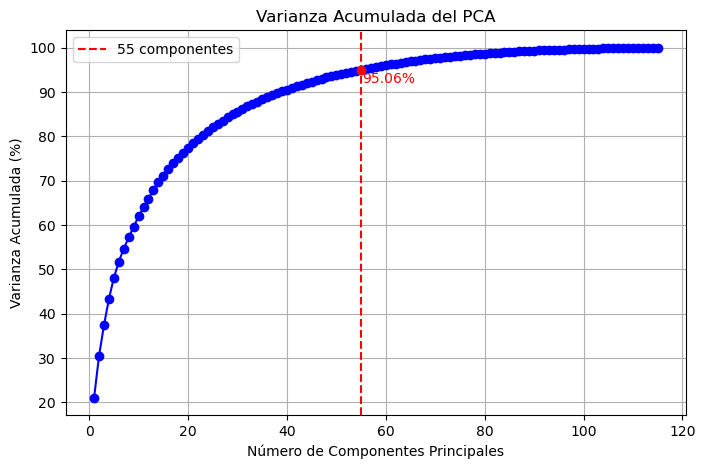

Con 55 componentes se alcanza el 95.06% de la varianza total.


In [27]:
# Obtener la varianza explicada
var = pca.explained_variance_ratio_

# Calcular la varianza acumulada
sum_var = np.cumsum(var)
sum_var_percent = np.round(sum_var, 4) * 100

# Encontrar el número de componentes necesarios para llegar al 95%
n_components_95 = np.argmax(sum_var >= 0.95) + 1   # +1 porque Python indexa desde 0
var_95 = sum_var_percent[n_components_95 - 1]  
# Graficar
plt.figure(figsize=(8,5))
plt.plot(range(1, len(var) + 1), sum_var_percent, marker='o', color='blue')
plt.grid()

# Línea vertical en el punto de 95%
plt.axvline(x=n_components_95, color='red', linestyle='--', label=f'{n_components_95} componentes')
plt.scatter(n_components_95, var_95, color='red', zorder=5)
plt.text(n_components_95 + 0.3, var_95 - 3, f"{var_95:.2f}%", color="red")

plt.xlabel("Número de Componentes Principales")
plt.ylabel("Varianza Acumulada (%)")
plt.title("Varianza Acumulada del PCA")
plt.legend()
plt.show()

print(f"Con {n_components_95} componentes se alcanza el {var_95:.2f}% de la varianza total.")

## Modelo de KNN

In [28]:
x_train_m.shape, x_test_m.shape, y_train_m.shape, y_test_m.shape

((214, 115), (92, 115), (214,), (92,))

In [29]:
# Crea y entrena el clasificador KNN, n_neighbors=5 y calcula la precisión en el conjunto de prueba
knn_mult = KNeighborsClassifier(n_neighbors=5)
knn_mult.fit(x_train_m, y_train_m)
score_mult = knn_mult.score(x_test_m, y_test_m)
print('Test set accuracy:', score_mult)  

Test set accuracy: 0.7608695652173914


In [30]:
predictions_knn_mult = knn_mult.predict(x_test_m)
pd.crosstab(y_test_m, predictions_knn_mult, rownames=["Actual"], colnames=['Predictions'])

Predictions,0,1
Actual,,
0,24,14
1,8,46


In [31]:
pca = PCA(n_components=60)
x_train_m_pca = pca.fit_transform(x_train_m)
x_test_m_pca = pca.transform(x_test_m)

In [32]:
# Crea y entrena el clasificador KNN, n_neighbors=5 y calcula la precisión en el conjunto de prueba
knn_mult_pca = KNeighborsClassifier(n_neighbors=5)
knn_mult_pca.fit(x_train_m_pca, y_train_m)
score_mult_pca = knn_mult_pca.score(x_test_m_pca, y_test_m)
print('Test set accuracy:', score_mult_pca)  

Test set accuracy: 0.7934782608695652


In [34]:
predictions_knn_mult_pca = knn_mult_pca.predict(x_test_m_pca)
pd.crosstab(y_test_m, predictions_knn_mult_pca, rownames=["Actual"], colnames=['Predictions'])

Predictions,0,1
Actual,,
0,27,11
1,8,46


## Modelo de regresión logistica

### Modelo con datos ómicos del análisis Multivariado

In [35]:
# Crea y entrena el clasificador de regresión logística y calcula la precisión en el conjunto de prueba
log_mult = LogisticRegression()
log_mult.fit(x_train_m, y_train_m)
score_rl_mult = log_mult.score(x_test_m, y_test_m)
print('Test set accuracy:', score_rl_mult)  

Test set accuracy: 0.6739130434782609


In [36]:
predictions_log_mult = log_mult.predict(x_test_m)
pd.crosstab(y_test_m, predictions_log_mult, rownames=["Actual"], colnames=['Predictions'])

Predictions,0,1
Actual,,
0,22,16
1,14,40


### Modelo con datos ómicos del análisis Multivariado + PCA

In [37]:
# Crea y entrena el clasificador de regresión logística y calcula la precisión en el conjunto de prueba
log_mult_pca = LogisticRegression()
log_mult_pca.fit(x_train_m_pca, y_train_m)
score_rl_mult_pca = log_mult_pca.score(x_test_m_pca, y_test_m)
print('Test set accuracy:', score_rl_mult_pca)  

Test set accuracy: 0.75


In [38]:
predictions_log_mult_pca = log_mult_pca.predict(x_test_m_pca)
pd.crosstab(y_test_m, predictions_log_mult_pca, rownames=["Actual"], colnames=['Predictions'])

Predictions,0,1
Actual,,
0,28,10
1,13,41


## Modelo de arboles aleatorios

### Modelo con datos ómicos del análisis Multivariado

In [39]:
forest_mult = RandomForestClassifier(n_jobs=2, oob_score=True, n_estimators=5000)
forest_mult.fit(x_train_m,y_train_m)
score_forest_mult = forest_mult.score(x_test_m, y_test_m)
print('Test set accuracy:', score_forest_mult)  


Test set accuracy: 0.8152173913043478


In [40]:
predictions_forest_mult = forest_mult.predict(x_test_m)
pd.crosstab(y_test_m, predictions_forest_mult, rownames=["Actual"], colnames=['Predictions'])

Predictions,0,1
Actual,,
0,26,12
1,5,49


### Modelo con datos ómicos del análisis Multivariado + PCA

In [41]:
forest_mult_pca = RandomForestClassifier(n_jobs=2, oob_score=True, n_estimators=5000)
forest_mult_pca.fit(x_train_m_pca,y_train_m)
score_forest_mult_pca = forest_mult_pca.score(x_test_m_pca, y_test_m)
print('Test set accuracy:', score_forest_mult_pca)  


Test set accuracy: 0.717391304347826


In [42]:
predictions_mult_pca = forest_mult_pca.predict(x_test_m_pca)
pd.crosstab(y_test_m, predictions_mult_pca, rownames=["Actual"], colnames=['Predictions'])

Predictions,0,1
Actual,,
0,16,22
1,4,50


# Predicción del estado del paciente empleando datos ómicos del análisis multivariado, proteinas y genes con VIP > 1.5

In [43]:
columnas_mult_15 = ["STAT5A","YBX1","XRCC1","RPS6KA1","PARK7","ACACA","SYK","FASN","Syk_p","NRAS","PRKCD","MTOR","YAP_pS127_p","PRDX1","ETS1","AR_p","AKT2","YAP1","AR","EEF2K","AKT1S1","GSK3B","GSK3A","PREX1","AKT3","ACC_pS79_p","53BP1_p","DJ-1_p","BCL2L1","BAP1","IRS1","STAT3","ACC1_p","YAP_p","PDK1","HER3_pY1289_p","PXN","BAX"]

omics_mult_15 = data_omics[columnas_mult_15]

x_train_m15, x_test_m15, y_train_m15, y_test_m15 = train_test_split(
    omics_mult_15, data['outcome'], test_size=0.3, random_state=42)

## Reducción de dimensionalidad con PCA en datos ómicos del análisis multivariado, proteinas y genes con VIP > 1.5

In [52]:
pca15 = PCA()
x_pca_m15 = pca15.fit_transform(x_train_m15)

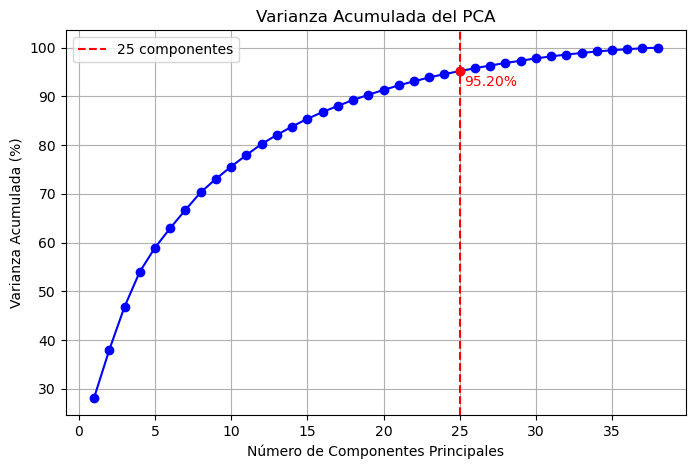

Con 25 componentes se alcanza el 95.20% de la varianza total.


In [53]:
# Obtener la varianza explicada
var = pca15.explained_variance_ratio_

# Calcular la varianza acumulada
sum_var = np.cumsum(var)
sum_var_percent = np.round(sum_var, 4) * 100

# Encontrar el número de componentes necesarios para llegar al 95%
n_components_95 = np.argmax(sum_var >= 0.95) + 1   # +1 porque Python indexa desde 0
var_95 = sum_var_percent[n_components_95 - 1]  
# Graficar
plt.figure(figsize=(8,5))
plt.plot(range(1, len(var) + 1), sum_var_percent, marker='o', color='blue')
plt.grid()

# Línea vertical en el punto de 95%
plt.axvline(x=n_components_95, color='red', linestyle='--', label=f'{n_components_95} componentes')
plt.scatter(n_components_95, var_95, color='red', zorder=5)
plt.text(n_components_95 + 0.3, var_95 - 3, f"{var_95:.2f}%", color="red")

plt.xlabel("Número de Componentes Principales")
plt.ylabel("Varianza Acumulada (%)")
plt.title("Varianza Acumulada del PCA")
plt.legend()
plt.show()

print(f"Con {n_components_95} componentes se alcanza el {var_95:.2f}% de la varianza total.")

In [55]:
pca15 = PCA(n_components=25)
x_train_m_pca15 = pca15.fit_transform(x_train_m15)
x_test_m_pca15 = pca15.transform(x_test_m15)

## Modelo de KNN

### Modelo con datos ómicos del análisis Multivariado

In [44]:
# Crea y entrena el clasificador KNN, n_neighbors=5 y calcula la precisión en el conjunto de prueba
knn_mult15 = KNeighborsClassifier(n_neighbors=5)
knn_mult15.fit(x_train_m15, y_train_m15)
score_mult15 = knn_mult15.score(x_test_m15, y_test_m15)
print('Test set accuracy:', score_mult15)  

Test set accuracy: 0.7934782608695652


In [46]:
predictions_knn_mult15 = knn_mult15.predict(x_test_m15)
pd.crosstab(y_test_m15, predictions_knn_mult15, rownames=["Actual"], colnames=['Predictions'])

Predictions,0,1
Actual,,
0,27,11
1,8,46


### Modelo con datos ómicos del análisis Multivariado + PCA

In [56]:
# Crea y entrena el clasificador KNN, n_neighbors=5 y calcula la precisión en el conjunto de prueba
knn_mult_pca15 = KNeighborsClassifier(n_neighbors=5)
knn_mult_pca15.fit(x_train_m_pca15, y_train_m15)
score_mult_pca15 = knn_mult_pca15.score(x_test_m_pca15, y_test_m15)
print('Test set accuracy:', score_mult_pca15)  

Test set accuracy: 0.7934782608695652


In [57]:
predictions_knn_mult_pca15 = knn_mult_pca15.predict(x_test_m_pca15)
pd.crosstab(y_test_m15, predictions_knn_mult_pca15, rownames=["Actual"], colnames=['Predictions'])

Predictions,0,1
Actual,,
0,26,12
1,7,47


## Modelo de regresión logistica

### Modelo con datos ómicos del análisis Multivariado

In [47]:
# Crea y entrena el clasificador de regresión logística y calcula la precisión en el conjunto de prueba
log_mult15 = LogisticRegression()
log_mult15.fit(x_train_m15, y_train_m15)
score_rl_mult15 = log_mult15.score(x_test_m15, y_test_m15)
print('Test set accuracy:', score_rl_mult15)  

Test set accuracy: 0.7717391304347826


In [48]:
predictions_log_mult15 = log_mult15.predict(x_test_m15)
pd.crosstab(y_test_m15, predictions_log_mult15, rownames=["Actual"], colnames=['Predictions'])

Predictions,0,1
Actual,,
0,26,12
1,9,45


### Modelo con datos ómicos del análisis Multivariado + PCA

In [58]:
# Crea y entrena el clasificador de regresión logística y calcula la precisión en el conjunto de prueba
log_mult_pca15 = LogisticRegression()
log_mult_pca15.fit(x_train_m_pca15, y_train_m15)
score_rl_mult_pca15 = log_mult_pca15.score(x_test_m_pca15, y_test_m15)
print('Test set accuracy:', score_rl_mult_pca15)  

Test set accuracy: 0.7282608695652174


In [59]:
predictions_log_mult_pca15 = log_mult_pca15.predict(x_test_m_pca15)
pd.crosstab(y_test_m15, predictions_log_mult_pca15, rownames=["Actual"], colnames=['Predictions'])

Predictions,0,1
Actual,,
0,25,13
1,12,42


## Modelo de arboles aleatorios

### Modelo con datos ómicos del análisis Multivariado

In [50]:
forest_mult15 = RandomForestClassifier(n_jobs=2, oob_score=True, n_estimators=5000)
forest_mult15.fit(x_train_m15,y_train_m15)
score_forest_mult15 = forest_mult15.score(x_test_m15, y_test_m15)
print('Test set accuracy:', score_forest_mult15)  


Test set accuracy: 0.8369565217391305


In [51]:
predictions_forest_mult15 = forest_mult15.predict(x_test_m15)
pd.crosstab(y_test_m15, predictions_forest_mult15, rownames=["Actual"], colnames=['Predictions'])

Predictions,0,1
Actual,,
0,27,11
1,4,50


### Modelo con datos ómicos del análisis Multivariado + PCA

In [60]:
forest_mult_pca15 = RandomForestClassifier(n_jobs=2, oob_score=True, n_estimators=5000)
forest_mult_pca15.fit(x_train_m_pca15,y_train_m15)
score_forest_mult_pca15 = forest_mult_pca15.score(x_test_m_pca15, y_test_m15)
print('Test set accuracy:', score_forest_mult_pca15)  


Test set accuracy: 0.7717391304347826


In [61]:
predictions_mult_pca15 = forest_mult_pca15.predict(x_test_m_pca15)
pd.crosstab(y_test_m15, predictions_mult_pca15, rownames=["Actual"], colnames=['Predictions'])

Predictions,0,1
Actual,,
0,23,15
1,6,48


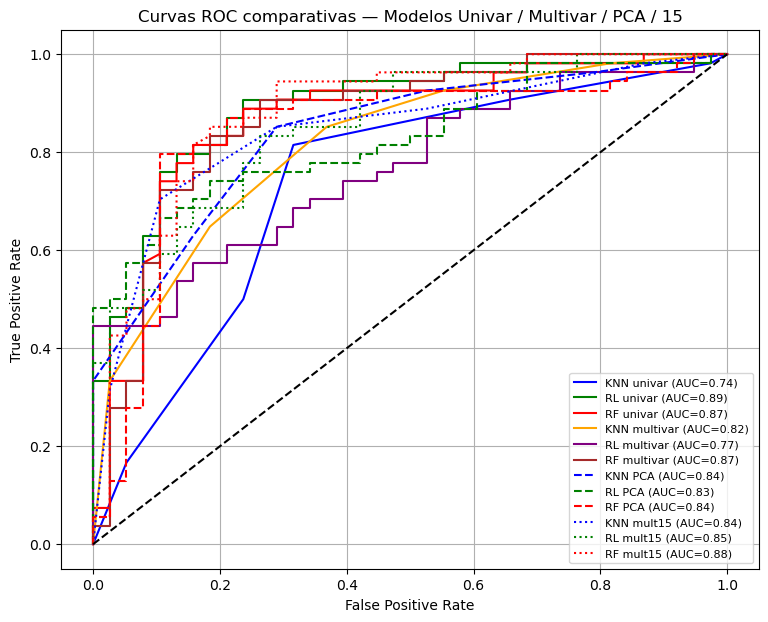

In [65]:
from sklearn.metrics import roc_curve, auc

# === Modelos univariados ===
probs_knn_u = knn_univar.predict_proba(x_test_u)[:, 1]
fpr_knn_u, tpr_knn_u, thresholds_knn_u = roc_curve(y_test_u, probs_knn_u)
roc_auc_knn_u = auc(fpr_knn_u, tpr_knn_u)

probs_log_u = log_univar.predict_proba(x_test_u)[:, 1]
fpr_log_u, tpr_log_u, thresholds_log_u = roc_curve(y_test_u, probs_log_u)
roc_auc_log_u = auc(fpr_log_u, tpr_log_u)

probs_forest_u = forest_univar.predict_proba(x_test_u)[:, 1]
fpr_forest_u, tpr_forest_u, thresholds_forest_u = roc_curve(y_test_u, probs_forest_u)
roc_auc_forest_u = auc(fpr_forest_u, tpr_forest_u)


# === Modelos multivariados ===
probs_knn_m = knn_mult.predict_proba(x_test_m)[:, 1]
fpr_knn_m, tpr_knn_m, thresholds_knn_m = roc_curve(y_test_m, probs_knn_m)
roc_auc_knn_m = auc(fpr_knn_m, tpr_knn_m)

probs_log_m = log_mult.predict_proba(x_test_m)[:, 1]
fpr_log_m, tpr_log_m, thresholds_log_m = roc_curve(y_test_m, probs_log_m)
roc_auc_log_m = auc(fpr_log_m, tpr_log_m)

probs_forest_m = forest_mult.predict_proba(x_test_m)[:, 1]
fpr_forest_m, tpr_forest_m, thresholds_forest_m = roc_curve(y_test_m, probs_forest_m)
roc_auc_forest_m = auc(fpr_forest_m, tpr_forest_m)


# === Modelos multivariados con PCA ===
probs_knn_mpca = knn_mult_pca.predict_proba(x_test_m_pca)[:, 1]
fpr_knn_mpca, tpr_knn_mpca, thresholds_knn_mpca = roc_curve(y_test_m, probs_knn_mpca)
roc_auc_knn_mpca = auc(fpr_knn_mpca, tpr_knn_mpca)

probs_log_mpca = log_mult_pca.predict_proba(x_test_m_pca)[:, 1]
fpr_log_mpca, tpr_log_mpca, thresholds_log_mpca = roc_curve(y_test_m, probs_log_mpca)
roc_auc_log_mpca = auc(fpr_log_mpca, tpr_log_mpca)

probs_forest_mpca = forest_mult_pca.predict_proba(x_test_m_pca)[:, 1]
fpr_forest_mpca, tpr_forest_mpca, thresholds_forest_mpca = roc_curve(y_test_m, probs_forest_mpca)
roc_auc_forest_mpca = auc(fpr_forest_mpca, tpr_forest_mpca)


# === Modelos multivariados 15 ===
probs_knn_m15 = knn_mult15.predict_proba(x_test_m15)[:, 1]
fpr_knn_m15, tpr_knn_m15, thresholds_knn_m15 = roc_curve(y_test_m15, probs_knn_m15)
roc_auc_knn_m15 = auc(fpr_knn_m15, tpr_knn_m15)

probs_log_m15 = log_mult15.predict_proba(x_test_m15)[:, 1]
fpr_log_m15, tpr_log_m15, thresholds_log_m15 = roc_curve(y_test_m15, probs_log_m15)
roc_auc_log_m15 = auc(fpr_log_m15, tpr_log_m15)

probs_forest_m15 = forest_mult15.predict_proba(x_test_m15)[:, 1]
fpr_forest_m15, tpr_forest_m15, thresholds_forest_m15 = roc_curve(y_test_m15, probs_forest_m15)
roc_auc_forest_m15 = auc(fpr_forest_m15, tpr_forest_m15)



# === Graficar todas las curvas ROC ===
plt.figure(figsize=(9,7))

plt.plot(fpr_knn_u, tpr_knn_u, label=f'KNN univar (AUC={roc_auc_knn_u:.2f})', color='blue')
plt.plot(fpr_log_u, tpr_log_u, label=f'RL univar (AUC={roc_auc_log_u:.2f})', color='green')
plt.plot(fpr_forest_u, tpr_forest_u, label=f'RF univar (AUC={roc_auc_forest_u:.2f})', color='red')

plt.plot(fpr_knn_m, tpr_knn_m, label=f'KNN multivar (AUC={roc_auc_knn_m:.2f})', color='orange')
plt.plot(fpr_log_m, tpr_log_m, label=f'RL multivar (AUC={roc_auc_log_m:.2f})', color='purple')
plt.plot(fpr_forest_m, tpr_forest_m, label=f'RF multivar (AUC={roc_auc_forest_m:.2f})', color='brown')

plt.plot(fpr_knn_mpca, tpr_knn_mpca, label=f'KNN PCA (AUC={roc_auc_knn_mpca:.2f})', linestyle='--', color='blue')
plt.plot(fpr_log_mpca, tpr_log_mpca, label=f'RL PCA (AUC={roc_auc_log_mpca:.2f})', linestyle='--', color='green')
plt.plot(fpr_forest_mpca, tpr_forest_mpca, label=f'RF PCA (AUC={roc_auc_forest_mpca:.2f})', linestyle='--', color='red')

plt.plot(fpr_knn_m15, tpr_knn_m15, label=f'KNN mult15 (AUC={roc_auc_knn_m15:.2f})', linestyle=':', color='blue')
plt.plot(fpr_log_m15, tpr_log_m15, label=f'RL mult15 (AUC={roc_auc_log_m15:.2f})', linestyle=':', color='green')
plt.plot(fpr_forest_m15, tpr_forest_m15, label=f'RF mult15 (AUC={roc_auc_forest_m15:.2f})', linestyle=':', color='red')

# Línea diagonal
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curvas ROC comparativas — Modelos Univar / Multivar / PCA / 15')
plt.legend(loc='lower right', fontsize=8)
plt.grid(True)
plt.show()


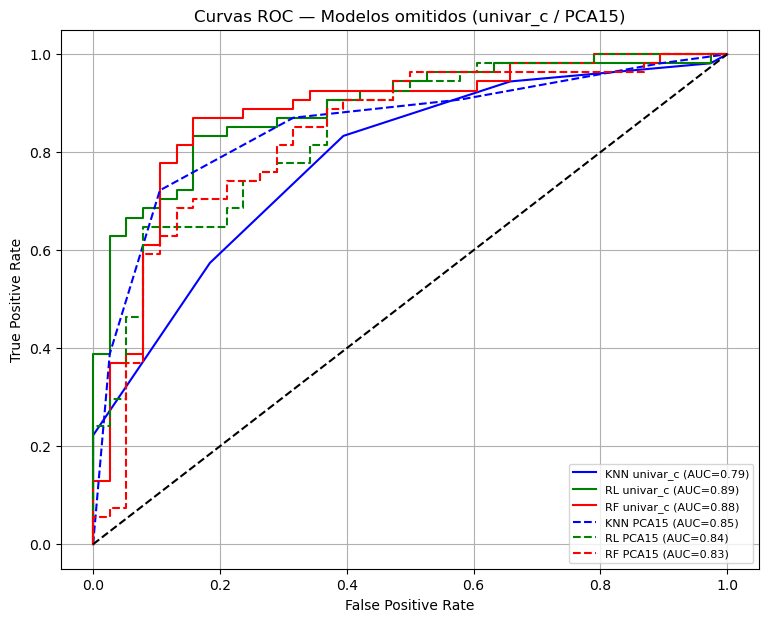

In [64]:

# === Modelos univariados (dataset _c) con thresholds guardados ===
probs_knn_uc = knn_univar_c.predict_proba(x_test_uc)[:, 1]
fpr_knn_uc, tpr_knn_uc, thresholds_knn_uc = roc_curve(y_test_uc, probs_knn_uc)
roc_auc_knn_uc = auc(fpr_knn_uc, tpr_knn_uc)

probs_log_uc = log_univar_c.predict_proba(x_test_uc)[:, 1]
fpr_log_uc, tpr_log_uc, thresholds_log_uc = roc_curve(y_test_uc, probs_log_uc)
roc_auc_log_uc = auc(fpr_log_uc, tpr_log_uc)

probs_forest_uc = forest_univar_c.predict_proba(x_test_uc)[:, 1]
fpr_forest_uc, tpr_forest_uc, thresholds_forest_uc = roc_curve(y_test_uc, probs_forest_uc)
roc_auc_forest_uc = auc(fpr_forest_uc, tpr_forest_uc)


# === Modelos multivariados PCA 15 con thresholds guardados ===
probs_knn_mpca15 = knn_mult_pca15.predict_proba(x_test_m_pca15)[:, 1]
fpr_knn_mpca15, tpr_knn_mpca15, thresholds_knn_mpca15 = roc_curve(y_test_m15, probs_knn_mpca15)
roc_auc_knn_mpca15 = auc(fpr_knn_mpca15, tpr_knn_mpca15)

probs_log_mpca15 = log_mult_pca15.predict_proba(x_test_m_pca15)[:, 1]
fpr_log_mpca15, tpr_log_mpca15, thresholds_log_mpca15 = roc_curve(y_test_m15, probs_log_mpca15)
roc_auc_log_mpca15 = auc(fpr_log_mpca15, tpr_log_mpca15)

probs_forest_mpca15 = forest_mult_pca15.predict_proba(x_test_m_pca15)[:, 1]
fpr_forest_mpca15, tpr_forest_mpca15, thresholds_forest_mpca15 = roc_curve(y_test_m15, probs_forest_mpca15)
roc_auc_forest_mpca15 = auc(fpr_forest_mpca15, tpr_forest_mpca15)


# === Graficar las curvas ROC omitidas ===
plt.figure(figsize=(9,7))

# Univar _c
plt.plot(fpr_knn_uc, tpr_knn_uc, label=f'KNN univar_c (AUC={roc_auc_knn_uc:.2f})', color='blue')
plt.plot(fpr_log_uc, tpr_log_uc, label=f'RL univar_c (AUC={roc_auc_log_uc:.2f})', color='green')
plt.plot(fpr_forest_uc, tpr_forest_uc, label=f'RF univar_c (AUC={roc_auc_forest_uc:.2f})', color='red')

# Multivar PCA15
plt.plot(fpr_knn_mpca15, tpr_knn_mpca15, label=f'KNN PCA15 (AUC={roc_auc_knn_mpca15:.2f})', linestyle='--', color='blue')
plt.plot(fpr_log_mpca15, tpr_log_mpca15, label=f'RL PCA15 (AUC={roc_auc_log_mpca15:.2f})', linestyle='--', color='green')
plt.plot(fpr_forest_mpca15, tpr_forest_mpca15, label=f'RF PCA15 (AUC={roc_auc_forest_mpca15:.2f})', linestyle='--', color='red')

# Línea diagonal
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curvas ROC — Modelos omitidos (univar_c / PCA15)')
plt.legend(loc='lower right', fontsize=8)
plt.grid(True)
plt.show()

## Optimización del thresholds

In [67]:
j = tpr_log_u - fpr_log_u

thresholds_log_u[np.argmax(j)]

np.float64(0.5136623987762325)

In [95]:


# DataFrame con probabilidades
prob_df = pd.DataFrame(probs_log_u, columns=['probabilidad'])

# Threshold óptimo
threshold_u = thresholds_log_u[np.argmax(j)]

# Predicciones usando el threshold
prob_df['prediccion'] = np.where(prob_df['probabilidad'] > 0.51, 1, 0)

# Valores reales
prob_df['actual'] = y_test_u.reset_index(drop=True)

# Matriz de confusión
matriz_confusion = pd.crosstab(prob_df['prediccion'], prob_df['actual'],
                               rownames=['Prediccion'], colnames=['Actual'])

print(matriz_confusion)

Actual       0   1
Prediccion        
0           29   5
1            9  49


In [69]:
jc = tpr_log_uc - fpr_log_uc

thresholds_log_uc[np.argmax(jc)]

np.float64(0.5848276613912176)

In [101]:
prob_df_uc = pd.DataFrame(probs_log_uc)
therehold_uc = thresholds_log_uc[np.argmax(j)]
prob_df_uc['prediccion'] = np.where(prob_df_uc[0]>0.58, 1, 0)
prob_df_uc['actual'] = y_test_uc.reset_index(drop=True)
matriz_confucion_uc = pd.crosstab(prob_df_uc.prediccion, prob_df_uc.actual, rownames=['Prediccion'], colnames=['Actual'])
matriz_confucion_uc

Actual,0,1
Prediccion,,
0,31,9
1,7,45


In [ ]:
probs_forest_u = forest_univar.predict_proba(x_test_u)[:, 1]
fpr_forest_u, tpr_forest_u, thresholds_forest_u = roc_curve(y_test_u, probs_forest_u)
roc_auc_forest_u = auc(fpr_forest_u, tpr_forest_u)


In [72]:
j_forest_u = tpr_forest_u - fpr_forest_u

thresholds_forest_u[np.argmax(j_forest_u)]

np.float64(0.606)

In [79]:
prob_forest_u = pd.DataFrame(probs_log_uc)
therehold_fu = thresholds_forest_u[np.argmax(j_forest_u)]
prob_forest_u['prediccion'] = np.where(prob_forest_u[0]> 0.54, 1, 0)
prob_forest_u['actual'] = y_test_u.reset_index(drop=True)
matriz_confucion_uc = pd.crosstab(prob_forest_u.prediccion, prob_forest_u.actual, rownames=['Prediccion'], colnames=['Actual'])
matriz_confucion_uc

Actual,0,1
Prediccion,,
0,30,8
1,8,46


# Modelos de Deep Learning

In [102]:
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [103]:
x = data_omics[columnas_univar]
y = data['outcome']

In [104]:
x.shape

(306, 13)

In [110]:
# Modelo base
def create_model():
    model = Sequential()
    model.add(Dense(30, input_dim = 13, activation = 'relu'))
    model.add(Dense(25, activation = 'relu'))
    model.add(Dense(20, activation = 'relu'))
    model.add(Dense(15, activation = 'relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Compilacion
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model
estimator = KerasClassifier(model= create_model,       
    epochs=250,
    batch_size=35,
    verbose=0)

kfold = StratifiedKFold(n_splits = 10, shuffle= True)
results = cross_val_score(estimator, x, y, cv = kfold)
print('Accuracy: %.2f%% (%.2f%%)' % (results.mean()*100, results.std()*100))

c:\Users\HP\anaconda3\envs\ciencia_datos\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\HP\anaconda3\envs\ciencia_datos\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\HP\anaconda3\envs\ciencia_datos\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(act

Accuracy: 66.01% (7.88%)
